# Table of Contents
 <p><div class="lev1 toc-item"><a href="#LSTM-Lecture" data-toc-modified-id="LSTM-Lecture-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>LSTM Lecture</a></div><div class="lev1 toc-item"><a href="#Data" data-toc-modified-id="Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data</a></div><div class="lev2 toc-item"><a href="#Reshaping-the-Data-2-(X-:-Multiple,-Y-:-Multiple)" data-toc-modified-id="Reshaping-the-Data-2-(X-:-Multiple,-Y-:-Multiple)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Reshaping the Data 2 (X : Multiple, Y : Multiple)</a></div><div class="lev3 toc-item"><a href="#Dimension" data-toc-modified-id="Dimension-211"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Dimension</a></div><div class="lev3 toc-item"><a href="#Assignment" data-toc-modified-id="Assignment-212"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Assignment</a></div><div class="lev3 toc-item"><a href="#Reshaping-:-1D-to-2D-(for-MinMaxScaler)" data-toc-modified-id="Reshaping-:-1D-to-2D-(for-MinMaxScaler)-213"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Reshaping : 1D to 2D (for <code>MinMaxScaler</code>)</a></div><div class="lev3 toc-item"><a href="#Scaling-:-MinMax,-0-~-1" data-toc-modified-id="Scaling-:-MinMax,-0-~-1-214"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Scaling : <code>MinMax</code>, 0 ~ 1</a></div><div class="lev3 toc-item"><a href="#Reshaping-X:-2D-to-3D,-(Samples,-Timestep-Sequence,-Features)" data-toc-modified-id="Reshaping-X:-2D-to-3D,-(Samples,-Timestep-Sequence,-Features)-215"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>Reshaping <code>X</code>: 2D to 3D, (Samples, Timestep-Sequence, Features)</a></div><div class="lev3 toc-item"><a href="#Padding" data-toc-modified-id="Padding-216"><span class="toc-item-num">2.1.6&nbsp;&nbsp;</span>Padding</a></div><div class="lev3 toc-item"><a href="#Start-&amp;-End-Marking" data-toc-modified-id="Start-&amp;-End-Marking-217"><span class="toc-item-num">2.1.7&nbsp;&nbsp;</span>Start &amp; End Marking</a></div><div class="lev3 toc-item"><a href="#Splitting-(Train-&amp;-Test)" data-toc-modified-id="Splitting-(Train-&amp;-Test)-218"><span class="toc-item-num">2.1.8&nbsp;&nbsp;</span>Splitting (Train &amp; Test)</a></div><div class="lev1 toc-item"><a href="#Encoder-Decoder-1-(RepeatVector)" data-toc-modified-id="Encoder-Decoder-1-(RepeatVector)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Encoder-Decoder 1 (RepeatVector)</a></div><div class="lev3 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-301"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Modeling</a></div><div class="lev3 toc-item"><a href="#Training" data-toc-modified-id="Training-302"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>Training</a></div><div class="lev3 toc-item"><a href="#Scoring" data-toc-modified-id="Scoring-303"><span class="toc-item-num">3.0.3&nbsp;&nbsp;</span>Scoring</a></div><div class="lev3 toc-item"><a href="#Testing" data-toc-modified-id="Testing-304"><span class="toc-item-num">3.0.4&nbsp;&nbsp;</span>Testing</a></div><div class="lev1 toc-item"><a href="#Encoder-Decoder-2-(Seq2Seq)---It-can-be-used-for-Text-Summarization" data-toc-modified-id="Encoder-Decoder-2-(Seq2Seq)---It-can-be-used-for-Text-Summarization-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Encoder-Decoder 2 (Seq2Seq) - It can be used for Text Summarization</a></div><div class="lev3 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-401"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Modeling</a></div><div class="lev3 toc-item"><a href="#Training" data-toc-modified-id="Training-402"><span class="toc-item-num">4.0.2&nbsp;&nbsp;</span>Training</a></div><div class="lev3 toc-item"><a href="#Scoring" data-toc-modified-id="Scoring-403"><span class="toc-item-num">4.0.3&nbsp;&nbsp;</span>Scoring</a></div><div class="lev3 toc-item"><a href="#Testing" data-toc-modified-id="Testing-404"><span class="toc-item-num">4.0.4&nbsp;&nbsp;</span>Testing</a></div><div class="lev4 toc-item"><a href="#Inference-Model" data-toc-modified-id="Inference-Model-4041"><span class="toc-item-num">4.0.4.1&nbsp;&nbsp;</span>Inference Model</a></div><div class="lev4 toc-item"><a href="#Inference-Model-within-a-Function" data-toc-modified-id="Inference-Model-within-a-Function-4042"><span class="toc-item-num">4.0.4.2&nbsp;&nbsp;</span>Inference Model within a Function</a></div><div class="lev1 toc-item"><a href="#Stateful" data-toc-modified-id="Stateful-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Stateful</a></div>

# LSTM Lecture

In Recurrent Neural Networks, we are quickly confronted to the so-called __gradient vanishing problem__:

In machine learning, __the vanishing gradient problem__ is a difficulty found in training artificial neural networks with gradient-based learning methods and backpropagation.  
In such methods, each of the neural network’s weights receives an update proportional to the gradient of the error function with respect to the current weight in each iteration of training.   
_Traditional activation functions such as the hyperbolic tangent function have gradients in the range `(−1,1)` or `(0,1)`_, and backpropagation computes gradients by the chain rule.  
This has the effect of multiplying n of these small numbers to compute gradients of the “front” layers in an n-layer network, meaning that the gradient (error signal) decreases exponentially with n and the front layers train very slowly.

One solution is __to consider *adding the updates* instead of multiplying them__, and this is exactly what the LSTM does. The state of every cell is updated in an additive way (Equation 9) such that the gradient hardly vanishes.

* Input  Gate  
* Forget Gate  
* Cell   State
* Output Gate 
* Hidden State 

![lstm](keras_stateful_lstm_2.png)
![lstm](lstm_basic.png)
![lstm](lstm_module.jpg)
![](LSTM.png)

!['lstm'](lstm.jpg)

In [1]:
import os
import math
import datetime as dt
import itertools as it
from glob import glob
from pprint import pprint

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential, Model
from keras.layers import LSTM, Dense, Flatten
from keras.callbacks import Callback, LambdaCallback

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.
/home/pydemia/apps/anaconda3/envs/tf-py36/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [108]:
from keras.layers import (TimeDistributed, Embedding, RepeatVector,
                          Permute, Lambda, Bidirectional)
from keras.preprocessing.sequence import pad_sequences
from keras import backend as K
from keras.layers import Input, Reshape, dot, multiply, concatenate, merge

In [151]:
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.weights = []
        self.states = []

#    def on_batch_begin(self, batch, logs={}):
#        self.weights.append([{'begin_' + layer.name: layer.get_weights()} for layer in model.layers])

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.weights.append([{'end_' + layer.name: layer.get_weights()} for layer in model.layers])
        

history = LossHistory()

print_weights = LambdaCallback(on_epoch_end=lambda batch, logs: pprint(model.layers[0].get_weights()))
#print_outputs = LambdaCallback(on_epoch_end=lambda batch, logs: pprint(model.layers[2].output))
#print_states = LambdaCallback(on_epoch_end=lambda batch, logs: pprint(model.layers[2].states))

# Data

In [4]:
data_len = 100
data = pd.DataFrame({'col1': np.arange(data_len),
                     'col2': np.arange(data_len) * 1.5,
                     'col3': np.round(np.cos(np.arange(data_len)), 2),
                     'col4': np.round(np.cos(np.arange(data_len) * 2), 2),
                     'col5': np.arange(0, data_len*.2, .2)})

data

,col1,col2,col3,col4,col5
0,0,0.0,1.00,1.00,0.0
1,1,1.5,0.54,-0.42,0.2
2,2,3.0,-0.42,-0.65,0.4
3,3,4.5,-0.99,0.96,0.6
4,4,6.0,-0.65,-0.15,0.8
5,5,7.5,0.28,-0.84,1.0
6,6,9.0,0.96,0.84,1.2
7,7,10.5,0.75,0.14,1.4
8,8,12.0,-0.15,-0.96,1.6
9,9,13.5,-0.91,0.66,1.8


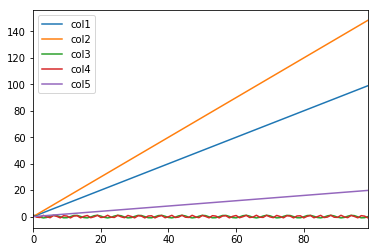

In [5]:
data.plot()

## Reshaping the Data 2 (X : Multiple, Y : Multiple)

### Dimension

In [6]:
xfeature = 1
yfeature = 1
look_back = timestep = xlen = 4
foresight = 1
ylen = 3

### Assignment

In [7]:
data_X_1d = data.iloc[:, :xfeature].values.astype('float32')
print(data_X_1d.shape)
data_X_1d[:5]

(100, 1)


array([[ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.]], dtype=float32)

In [8]:
data_Y_1d = data.iloc[:, -yfeature:].values.astype('float32')
print(data_Y_1d.shape)
data_Y_1d[:5]

(100, 1)


array([[ 0.        ],
       [ 0.2       ],
       [ 0.40000001],
       [ 0.60000002],
       [ 0.80000001]], dtype=float32)

### Reshaping : 1D to 2D (for `MinMaxScaler`)

In [9]:
data_X_1d.shape

(100, 1)

In [10]:
data_X_2d = data_X_1d.reshape(-1, xfeature)
print(data_X_2d.shape)
data_X_2d[:5]

(100, 1)


array([[ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.]], dtype=float32)

In [11]:
data_Y_2d = data_Y_1d.reshape(-1, yfeature)
print(data_Y_2d.shape)
data_Y_2d[:5]

(100, 1)


array([[ 0.        ],
       [ 0.2       ],
       [ 0.40000001],
       [ 0.60000002],
       [ 0.80000001]], dtype=float32)

### Scaling : `MinMax`, 0 ~ 1

In [12]:
scalerX = MinMaxScaler(feature_range=(0, 1))
scalerY = MinMaxScaler(feature_range=(0, 1))  # sigmoid(0, 1), tanh(-1, 1)

scaled_X = scalerX.fit_transform(data_X_2d)
scaled_Y = scalerY.fit_transform(data_Y_2d)

print(scaled_X[:5])
print(scaled_Y[:5])

[[ 0.        ]
 [ 0.01010101]
 [ 0.02020202]
 [ 0.03030303]
 [ 0.04040404]]
[[ 0.        ]
 [ 0.01010101]
 [ 0.02020202]
 [ 0.03030303]
 [ 0.04040404]]


### Reshaping `X`: 2D to 3D, (Samples, Timestep-Sequence, Features)

In [13]:
len(scaled_X) - xlen - foresight - ylen

92

In [14]:
seq_X = np.array([scaled_X[i:i+xlen] for i in range(0, len(scaled_X) - xlen - (foresight - 1) - (ylen - 1))])
print('X Shape:', seq_X.shape)
seq_X[:5]

X Shape: (94, 4, 1)


array([[[ 0.        ],
        [ 0.01010101],
        [ 0.02020202],
        [ 0.03030303]],

       [[ 0.01010101],
        [ 0.02020202],
        [ 0.03030303],
        [ 0.04040404]],

       [[ 0.02020202],
        [ 0.03030303],
        [ 0.04040404],
        [ 0.05050505]],

       [[ 0.03030303],
        [ 0.04040404],
        [ 0.05050505],
        [ 0.06060606]],

       [[ 0.04040404],
        [ 0.05050505],
        [ 0.06060606],
        [ 0.07070707]]], dtype=float32)

In [15]:
seq_Y = np.array([scaled_Y[i:i+ylen] for i in range(xlen + (foresight - 1), len(scaled_Y) - (ylen - 1))])
print('Y Shape:', seq_Y.shape)
seq_Y[:5]

Y Shape: (94, 3, 1)


array([[[ 0.04040404],
        [ 0.05050505],
        [ 0.06060607]],

       [[ 0.05050505],
        [ 0.06060607],
        [ 0.07070708]],

       [[ 0.06060607],
        [ 0.07070708],
        [ 0.08080809]],

       [[ 0.07070708],
        [ 0.08080809],
        [ 0.09090909]],

       [[ 0.08080809],
        [ 0.09090909],
        [ 0.10101011]]], dtype=float32)

### Padding

In [16]:
max_len = max(xlen, ylen)

In [17]:
seq_X = pad_sequences(seq_X, maxlen=max_len, dtype='float32', padding='pre')

In [18]:
padded_seq_Y = pad_sequences(seq_Y, maxlen=max_len, dtype='float32', padding='pre')
padded_seq_Y[:5]

array([[[ 0.        ],
        [ 0.04040404],
        [ 0.05050505],
        [ 0.06060607]],

       [[ 0.        ],
        [ 0.05050505],
        [ 0.06060607],
        [ 0.07070708]],

       [[ 0.        ],
        [ 0.06060607],
        [ 0.07070708],
        [ 0.08080809]],

       [[ 0.        ],
        [ 0.07070708],
        [ 0.08080809],
        [ 0.09090909]],

       [[ 0.        ],
        [ 0.08080809],
        [ 0.09090909],
        [ 0.10101011]]], dtype=float32)

### Start & End Marking

In [19]:
seq_Y.shape

(94, 3, 1)

In [20]:
decoder_input_Y  = pad_sequences(seq_Y, maxlen=1+ylen, dtype='float32', padding='pre', value=0.)
decoder_input_Y  = pad_sequences(decoder_input_Y, maxlen=max_len, dtype='float32', padding='post', value=0.)
decoder_target_Y = pad_sequences(seq_Y, maxlen=max_len, dtype='float32', padding='post', value=0.)

In [21]:
decoder_input_Y[:5]

array([[[ 0.        ],
        [ 0.04040404],
        [ 0.05050505],
        [ 0.06060607]],

       [[ 0.        ],
        [ 0.05050505],
        [ 0.06060607],
        [ 0.07070708]],

       [[ 0.        ],
        [ 0.06060607],
        [ 0.07070708],
        [ 0.08080809]],

       [[ 0.        ],
        [ 0.07070708],
        [ 0.08080809],
        [ 0.09090909]],

       [[ 0.        ],
        [ 0.08080809],
        [ 0.09090909],
        [ 0.10101011]]], dtype=float32)

In [22]:
decoder_target_Y[:5]

array([[[ 0.04040404],
        [ 0.05050505],
        [ 0.06060607],
        [ 0.        ]],

       [[ 0.05050505],
        [ 0.06060607],
        [ 0.07070708],
        [ 0.        ]],

       [[ 0.06060607],
        [ 0.07070708],
        [ 0.08080809],
        [ 0.        ]],

       [[ 0.07070708],
        [ 0.08080809],
        [ 0.09090909],
        [ 0.        ]],

       [[ 0.08080809],
        [ 0.09090909],
        [ 0.10101011],
        [ 0.        ]]], dtype=float32)

### Splitting (Train & Test)

In [23]:
test_size = .3

(train_X, test_X,
 train_Y, test_Y) = train_test_split(seq_X, padded_seq_Y,
                                    test_size=test_size,
                                    shuffle=False,
                                    random_state=99)

(train_decoder_input_Y,
 test_decoder_input_Y,
 train_decoder_target_Y,
 test_decoder_target_Y) = train_test_split(decoder_input_Y,
                                           decoder_target_Y,
                                           test_size=test_size,
                                           shuffle=False,
                                           random_state=99)

print(train_X.shape, train_Y.shape)
print('Train_X\t: %s\nTrain_Y\t: %s\nTest_X\t: %s\nTest_Y\t: %s\n' % 
      (train_X.shape, train_Y.shape, test_X.shape, test_Y.shape))

(65, 4, 1) (65, 4, 1)
Train_X	: (65, 4, 1)
Train_Y	: (65, 4, 1)
Test_X	: (29, 4, 1)
Test_Y	: (29, 4, 1)



---
# Encoder-Decoder 1 (RepeatVector)

!['lstm_many_to_many_1'](lstm_many_to_many_1.jpg)

!['lstm_seq_to_seq_1'](lstm_encdec_2.png)

!['lstm_seq_to_seq_1'](seq2seq_1.png)

`keras.layers.Embedding`:  
> `(nb_words, vocab_size) x (vocab_size, embedding_dim) = (nb_words, embedding_dim)`

### Modeling

In [30]:
_, timestepX, ndimX = train_X.shape
_, timestepY, ndimY = train_Y.shape
#_, ndimY = seq_Y.shape

HIDDEN_SIZE = 16

# simple lstm network learning
model = Sequential()
"""
2D: (batch_size, units)
3D: (batch_size, timesteps, input_dim)
"""
model.add(LSTM(HIDDEN_SIZE,  # Network Node
               input_shape=(timestepX, ndimX),  # Time-step, Feature Number
               #dropout=.3,  # Drop-Out Ratio; Among the Input
               recurrent_dropout=.3,  # Recurrent Drop-out Ratio; Among the Recurrent Network
               return_sequences=False,  # If LSTM Returns the sequence;the same dimension of the input.
               kernel_initializer=keras.initializers.Zeros(),
               recurrent_initializer='zeros',
               bias_initializer=keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None),
               use_bias=True
              ))

model.add(RepeatVector(timestepX))


model.add(LSTM(HIDDEN_SIZE,  # Network Node
               input_shape=(timestepX, ndimX),  # Time-step, Feature Number
               #dropout=.3,  # Drop-Out Ratio; Among the Input
               recurrent_dropout=.3,  # Recurrent Drop-out Ratio; Among the Recurrent Network
               return_sequences=True,  # If LSTM Returns the sequence;the same dimension of the input.
               kernel_initializer=keras.initializers.Zeros(),
               recurrent_initializer='zeros',
               bias_initializer=keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None),
               use_bias=True
              ))

# TimeDistributed to compare the predicted with the real one, sequence by sequence
model.add(TimeDistributed(Dense(ndimY,  # Network Node
                                input_shape=(ylen, ndimY),
                                activation='linear'),))

#model.add(Dense(ndimY,  # Network Node
#                input_shape=(ylen, ndimY),  # Time-step, Feature Number
#                activation='linear',
#                kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None),
#                bias_initializer=keras.initializers.Constant(value=0),))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 16)                1152      
_________________________________________________________________
repeat_vector_3 (RepeatVecto (None, 4, 16)             0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 4, 16)             2112      
_________________________________________________________________
time_distributed_3 (TimeDist (None, 4, 1)              17        
Total params: 3,281
Trainable params: 3,281
Non-trainable params: 0
_________________________________________________________________


### Training

In [31]:
EPOCH_NUM = 300
BATCH_SIZE = 32

fitted = model.fit(train_X, train_Y,
                   epochs=EPOCH_NUM,     # How many times to run back_propagation
                   batch_size=BATCH_SIZE,  # How many data to deal with at one epoch
                   validation_split=.2,
                   verbose=1,       # 1: progress bar, 2: one line per epoch
                   #validation_data=(testX, testY),  # Validation set
                   shuffle=False,
                   callbacks=[history])

Train on 52 samples, validate on 13 samples
Epoch 1/300
52/52 [==============================] - 1s 11ms/step - loss: 0.0779 - mean_absolute_error: 0.2165 - val_loss: 0.2784 - val_mean_absolute_error: 0.4595
Epoch 2/300
52/52 [==============================] - 0s 380us/step - loss: 0.0751 - mean_absolute_error: 0.2124 - val_loss: 0.2717 - val_mean_absolute_error: 0.4549
Epoch 3/300
52/52 [==============================] - 0s 382us/step - loss: 0.0720 - mean_absolute_error: 0.2078 - val_loss: 0.2645 - val_mean_absolute_error: 0.4500
Epoch 4/300
52/52 [==============================] - 0s 386us/step - loss: 0.0688 - mean_absolute_error: 0.2029 - val_loss: 0.2570 - val_mean_absolute_error: 0.4448
Epoch 5/300
52/52 [==============================] - 0s 385us/step - loss: 0.0655 - mean_absolute_error: 0.1978 - val_loss: 0.2493 - val_mean_absolute_error: 0.4392
Epoch 6/300
52/52 [==============================] - 0s 381us/step - loss: 0.0622 - mean_absolute_error: 0.1926 - val_loss: 0.2412 -

52/52 [==============================] - 0s 398us/step - loss: 0.0194 - mean_absolute_error: 0.1231 - val_loss: 0.0633 - val_mean_absolute_error: 0.2391
Epoch 51/300
52/52 [==============================] - 0s 376us/step - loss: 0.0194 - mean_absolute_error: 0.1228 - val_loss: 0.0626 - val_mean_absolute_error: 0.2377
Epoch 52/300
52/52 [==============================] - 0s 410us/step - loss: 0.0193 - mean_absolute_error: 0.1226 - val_loss: 0.0619 - val_mean_absolute_error: 0.2363
Epoch 53/300
52/52 [==============================] - 0s 378us/step - loss: 0.0192 - mean_absolute_error: 0.1223 - val_loss: 0.0613 - val_mean_absolute_error: 0.2351
Epoch 54/300
52/52 [==============================] - 0s 375us/step - loss: 0.0191 - mean_absolute_error: 0.1220 - val_loss: 0.0607 - val_mean_absolute_error: 0.2340
Epoch 55/300
52/52 [==============================] - 0s 384us/step - loss: 0.0190 - mean_absolute_error: 0.1217 - val_loss: 0.0602 - val_mean_absolute_error: 0.2330
Epoch 56/300
52/5

52/52 [==============================] - 0s 394us/step - loss: 0.0136 - mean_absolute_error: 0.1014 - val_loss: 0.0400 - val_mean_absolute_error: 0.1830
Epoch 100/300
52/52 [==============================] - 0s 387us/step - loss: 0.0135 - mean_absolute_error: 0.1008 - val_loss: 0.0395 - val_mean_absolute_error: 0.1816
Epoch 101/300
52/52 [==============================] - 0s 398us/step - loss: 0.0134 - mean_absolute_error: 0.1002 - val_loss: 0.0390 - val_mean_absolute_error: 0.1801
Epoch 102/300
52/52 [==============================] - 0s 382us/step - loss: 0.0132 - mean_absolute_error: 0.0997 - val_loss: 0.0386 - val_mean_absolute_error: 0.1787
Epoch 103/300
52/52 [==============================] - 0s 381us/step - loss: 0.0131 - mean_absolute_error: 0.0991 - val_loss: 0.0381 - val_mean_absolute_error: 0.1772
Epoch 104/300
52/52 [==============================] - 0s 383us/step - loss: 0.0130 - mean_absolute_error: 0.0985 - val_loss: 0.0377 - val_mean_absolute_error: 0.1757
Epoch 105/30

52/52 [==============================] - 0s 402us/step - loss: 0.0083 - mean_absolute_error: 0.0771 - val_loss: 0.0257 - val_mean_absolute_error: 0.1415
Epoch 149/300
52/52 [==============================] - 0s 418us/step - loss: 0.0082 - mean_absolute_error: 0.0767 - val_loss: 0.0256 - val_mean_absolute_error: 0.1414
Epoch 150/300
52/52 [==============================] - 0s 383us/step - loss: 0.0082 - mean_absolute_error: 0.0763 - val_loss: 0.0256 - val_mean_absolute_error: 0.1413
Epoch 151/300
52/52 [==============================] - 0s 400us/step - loss: 0.0081 - mean_absolute_error: 0.0759 - val_loss: 0.0255 - val_mean_absolute_error: 0.1412
Epoch 152/300
52/52 [==============================] - 0s 393us/step - loss: 0.0081 - mean_absolute_error: 0.0756 - val_loss: 0.0255 - val_mean_absolute_error: 0.1411
Epoch 153/300
52/52 [==============================] - 0s 403us/step - loss: 0.0080 - mean_absolute_error: 0.0752 - val_loss: 0.0254 - val_mean_absolute_error: 0.1410
Epoch 154/30

52/52 [==============================] - 0s 380us/step - loss: 0.0068 - mean_absolute_error: 0.0656 - val_loss: 0.0259 - val_mean_absolute_error: 0.1378
Epoch 198/300
52/52 [==============================] - 0s 402us/step - loss: 0.0068 - mean_absolute_error: 0.0655 - val_loss: 0.0259 - val_mean_absolute_error: 0.1378
Epoch 199/300
52/52 [==============================] - 0s 380us/step - loss: 0.0068 - mean_absolute_error: 0.0654 - val_loss: 0.0259 - val_mean_absolute_error: 0.1378
Epoch 200/300
52/52 [==============================] - 0s 385us/step - loss: 0.0068 - mean_absolute_error: 0.0653 - val_loss: 0.0260 - val_mean_absolute_error: 0.1378
Epoch 201/300
52/52 [==============================] - 0s 387us/step - loss: 0.0068 - mean_absolute_error: 0.0652 - val_loss: 0.0260 - val_mean_absolute_error: 0.1379
Epoch 202/300
52/52 [==============================] - 0s 382us/step - loss: 0.0068 - mean_absolute_error: 0.0651 - val_loss: 0.0260 - val_mean_absolute_error: 0.1379
Epoch 203/30

52/52 [==============================] - 0s 398us/step - loss: 0.0065 - mean_absolute_error: 0.0619 - val_loss: 0.0255 - val_mean_absolute_error: 0.1355
Epoch 247/300
52/52 [==============================] - 0s 390us/step - loss: 0.0065 - mean_absolute_error: 0.0618 - val_loss: 0.0255 - val_mean_absolute_error: 0.1354
Epoch 248/300
52/52 [==============================] - 0s 386us/step - loss: 0.0065 - mean_absolute_error: 0.0618 - val_loss: 0.0255 - val_mean_absolute_error: 0.1354
Epoch 249/300
52/52 [==============================] - 0s 384us/step - loss: 0.0065 - mean_absolute_error: 0.0617 - val_loss: 0.0254 - val_mean_absolute_error: 0.1353
Epoch 250/300
52/52 [==============================] - 0s 382us/step - loss: 0.0064 - mean_absolute_error: 0.0616 - val_loss: 0.0254 - val_mean_absolute_error: 0.1352
Epoch 251/300
52/52 [==============================] - 0s 383us/step - loss: 0.0064 - mean_absolute_error: 0.0616 - val_loss: 0.0254 - val_mean_absolute_error: 0.1351
Epoch 252/30

52/52 [==============================] - 0s 383us/step - loss: 0.0062 - mean_absolute_error: 0.0595 - val_loss: 0.0243 - val_mean_absolute_error: 0.1307
Epoch 296/300
52/52 [==============================] - 0s 384us/step - loss: 0.0061 - mean_absolute_error: 0.0595 - val_loss: 0.0243 - val_mean_absolute_error: 0.1306
Epoch 297/300
52/52 [==============================] - 0s 399us/step - loss: 0.0061 - mean_absolute_error: 0.0594 - val_loss: 0.0243 - val_mean_absolute_error: 0.1305
Epoch 298/300
52/52 [==============================] - 0s 388us/step - loss: 0.0061 - mean_absolute_error: 0.0594 - val_loss: 0.0243 - val_mean_absolute_error: 0.1304
Epoch 299/300
52/52 [==============================] - 0s 397us/step - loss: 0.0061 - mean_absolute_error: 0.0593 - val_loss: 0.0242 - val_mean_absolute_error: 0.1303
Epoch 300/300
52/52 [==============================] - 0s 390us/step - loss: 0.0061 - mean_absolute_error: 0.0593 - val_loss: 0.0242 - val_mean_absolute_error: 0.1302


### Scoring

/home/pydemia/apps/anaconda3/envs/tf-py36/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


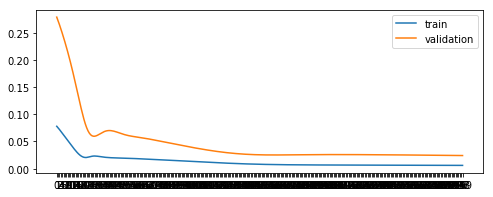

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 3))
ax.plot(fitted.history['loss'], label='train')
if 'val_loss' in fitted.history.keys():
    ax.plot(fitted.history['val_loss'], label='validation')
ax.legend()
ax.set_xticks(np.arange(EPOCH_NUM))
fig.show()

* Train mean of RMSE

In [33]:
train_Y_hat_array = fitted.model.predict(train_X)
train_Y_real = np.array([scalerY.inverse_transform(Y) for Y  in train_Y])
train_Y_hat = np.array([scalerY.inverse_transform(Y_hat) for Y_hat in train_Y_hat_array])

mse_array = [math.sqrt(mean_squared_error(Y_real, Y_hat)) for Y_real, Y_hat in zip(train_Y_real, train_Y_hat)]
train_score = np.mean(mse_array)
print('Training Score: %.3f RMSE' % train_score)

Training Score: 1.720 RMSE


### Testing

In [34]:
test_Y_hat_array = fitted.model.predict(test_X)
test_Y_real = np.array([scalerY.inverse_transform(Y) for Y  in test_Y])
test_Y_hat = np.array([scalerY.inverse_transform(Y_hat) for Y_hat in test_Y_hat_array])

mse_array = [math.sqrt(mean_squared_error(Y_real, Y_hat)) for Y_real, Y_hat in zip(test_Y_real, test_Y_hat)]
test_score = np.mean(mse_array)
print('Test Score: %.3f RMSE' % test_score)
print('Real\t:\n %s,\nPredict\t:\n %s' % (test_Y_real[-1], test_Y_hat[-1]))

Test Score: 4.832 RMSE
Real	:
 [[  0.        ]
 [ 19.39999962]
 [ 19.60000038]
 [ 19.79999924]],
Predict	:
 [[  9.75561047]
 [ 18.03530121]
 [ 23.42274857]
 [ 26.57158852]]


---
# Encoder-Decoder 2 (Seq2Seq) - It can be used for Text Summarization

!['lstm_many_to_many_1'](lstm_many_to_many_1.jpg)
!['lstm_seq_to_seq_1'](lstm_encdec_2.png)
!['lstm_seq_to_seq_1'](seq2seq_1.png)
!['Use of a summary state in the encoder-decoder architecture'](lstm_attention_1.png)

`keras.layers.Embedding`:  
> `(nb_words, vocab_size) x (vocab_size, embedding_dim) = (nb_words, embedding_dim)`

### Modeling

In [36]:
train_X.shape

(65, 4, 1)

In [37]:
train_decoder_input_Y.shape

(65, 4, 1)

In [38]:
_, timestepX, ndimX = train_X.shape
_, timestepY, ndimY = train_decoder_target_Y.shape
#_, ndimY = seq_Y.shape

num_encoder_tokens = ndimX
latent_dim = 4
num_decoder_tokens = ndimY

In [39]:
# Define an input sequence and process it.
encoder_inputs = Input(shape=(None, ndimX), name='Encoder_Input')
encoder = LSTM(latent_dim, return_state=True, name='Encoder_LSTM')
encoder_outputs, state_h, state_c = encoder(encoder_inputs)
# We discard `encoder_outputs` and only keep the states.
encoder_states = [state_h, state_c]

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None, num_decoder_tokens), name='Decoder_Input')
# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the 
# return states in the training model, but we will use them in inference.
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True, name='Decoder_LSTM')
decoder_outputs, _, _ = decoder_lstm(decoder_inputs,
                                     initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='sigmoid', name='Decoder_Output')
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

pprint(model.weights)
model.summary()

[<tf.Variable 'Encoder_LSTM/kernel:0' shape=(1, 16) dtype=float32_ref>,
 <tf.Variable 'Encoder_LSTM/recurrent_kernel:0' shape=(4, 16) dtype=float32_ref>,
 <tf.Variable 'Encoder_LSTM/bias:0' shape=(16,) dtype=float32_ref>,
 <tf.Variable 'Decoder_LSTM/kernel:0' shape=(1, 16) dtype=float32_ref>,
 <tf.Variable 'Decoder_LSTM/recurrent_kernel:0' shape=(4, 16) dtype=float32_ref>,
 <tf.Variable 'Decoder_LSTM/bias:0' shape=(16,) dtype=float32_ref>,
 <tf.Variable 'Decoder_Output/kernel:0' shape=(4, 1) dtype=float32_ref>,
 <tf.Variable 'Decoder_Output/bias:0' shape=(1,) dtype=float32_ref>]
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Encoder_Input (InputLayer)      (None, None, 1)      0                                            
__________________________________________________________________________________________________
Decoder_Input (Inp

### Training

In [47]:
# Run training

EPOCH_NUM = 300
BATCH_SIZE = 32

fitted = model.fit([train_X, train_decoder_input_Y], train_decoder_target_Y,
                   epochs=EPOCH_NUM,     # How many times to run back_propagation
                   batch_size=BATCH_SIZE,  # How many data to deal with at one epoch
                   validation_split=0.2,
                   verbose=1,       # 1: progress bar, 2: one line per epoch
                   #validation_data=(testX, testY),  # Validation set
                   shuffle=False,
                   callbacks=[history])

# Save model
#model.save('s2s.h5')

Train on 52 samples, validate on 13 samples
Epoch 1/300
52/52 [==============================] - 0s 423us/step - loss: 0.0311 - mean_absolute_error: 0.1569 - val_loss: 0.1015 - val_mean_absolute_error: 0.3040
Epoch 2/300
52/52 [==============================] - 0s 403us/step - loss: 0.0309 - mean_absolute_error: 0.1565 - val_loss: 0.1015 - val_mean_absolute_error: 0.3040
Epoch 3/300
52/52 [==============================] - 0s 393us/step - loss: 0.0308 - mean_absolute_error: 0.1560 - val_loss: 0.1016 - val_mean_absolute_error: 0.3039
Epoch 4/300
52/52 [==============================] - 0s 413us/step - loss: 0.0306 - mean_absolute_error: 0.1556 - val_loss: 0.1016 - val_mean_absolute_error: 0.3038
Epoch 5/300
52/52 [==============================] - 0s 396us/step - loss: 0.0305 - mean_absolute_error: 0.1552 - val_loss: 0.1016 - val_mean_absolute_error: 0.3037
Epoch 6/300
52/52 [==============================] - 0s 395us/step - loss: 0.0303 - mean_absolute_error: 0.1548 - val_loss: 0.1016 

52/52 [==============================] - 0s 383us/step - loss: 0.0251 - mean_absolute_error: 0.1399 - val_loss: 0.0892 - val_mean_absolute_error: 0.2835
Epoch 51/300
52/52 [==============================] - 0s 356us/step - loss: 0.0250 - mean_absolute_error: 0.1395 - val_loss: 0.0887 - val_mean_absolute_error: 0.2828
Epoch 52/300
52/52 [==============================] - 0s 367us/step - loss: 0.0249 - mean_absolute_error: 0.1392 - val_loss: 0.0883 - val_mean_absolute_error: 0.2821
Epoch 53/300
52/52 [==============================] - 0s 348us/step - loss: 0.0248 - mean_absolute_error: 0.1388 - val_loss: 0.0878 - val_mean_absolute_error: 0.2814
Epoch 54/300
52/52 [==============================] - 0s 346us/step - loss: 0.0246 - mean_absolute_error: 0.1385 - val_loss: 0.0873 - val_mean_absolute_error: 0.2807
Epoch 55/300
52/52 [==============================] - 0s 353us/step - loss: 0.0245 - mean_absolute_error: 0.1381 - val_loss: 0.0869 - val_mean_absolute_error: 0.2800
Epoch 56/300
52/5

52/52 [==============================] - 0s 351us/step - loss: 0.0187 - mean_absolute_error: 0.1191 - val_loss: 0.0634 - val_mean_absolute_error: 0.2416
Epoch 100/300
52/52 [==============================] - 0s 366us/step - loss: 0.0186 - mean_absolute_error: 0.1186 - val_loss: 0.0629 - val_mean_absolute_error: 0.2407
Epoch 101/300
52/52 [==============================] - 0s 359us/step - loss: 0.0184 - mean_absolute_error: 0.1181 - val_loss: 0.0624 - val_mean_absolute_error: 0.2398
Epoch 102/300
52/52 [==============================] - 0s 362us/step - loss: 0.0183 - mean_absolute_error: 0.1176 - val_loss: 0.0619 - val_mean_absolute_error: 0.2388
Epoch 103/300
52/52 [==============================] - 0s 357us/step - loss: 0.0182 - mean_absolute_error: 0.1171 - val_loss: 0.0614 - val_mean_absolute_error: 0.2379
Epoch 104/300
52/52 [==============================] - 0s 344us/step - loss: 0.0180 - mean_absolute_error: 0.1165 - val_loss: 0.0609 - val_mean_absolute_error: 0.2370
Epoch 105/30

52/52 [==============================] - 0s 383us/step - loss: 0.0133 - mean_absolute_error: 0.0969 - val_loss: 0.0476 - val_mean_absolute_error: 0.2038
Epoch 149/300
52/52 [==============================] - 0s 361us/step - loss: 0.0133 - mean_absolute_error: 0.0966 - val_loss: 0.0474 - val_mean_absolute_error: 0.2033
Epoch 150/300
52/52 [==============================] - 0s 363us/step - loss: 0.0132 - mean_absolute_error: 0.0963 - val_loss: 0.0473 - val_mean_absolute_error: 0.2027
Epoch 151/300
52/52 [==============================] - 0s 358us/step - loss: 0.0131 - mean_absolute_error: 0.0960 - val_loss: 0.0472 - val_mean_absolute_error: 0.2022
Epoch 152/300
52/52 [==============================] - 0s 373us/step - loss: 0.0131 - mean_absolute_error: 0.0957 - val_loss: 0.0470 - val_mean_absolute_error: 0.2017
Epoch 153/300
52/52 [==============================] - 0s 349us/step - loss: 0.0130 - mean_absolute_error: 0.0954 - val_loss: 0.0469 - val_mean_absolute_error: 0.2012
Epoch 154/30

52/52 [==============================] - 0s 375us/step - loss: 0.0116 - mean_absolute_error: 0.0886 - val_loss: 0.0430 - val_mean_absolute_error: 0.1849
Epoch 198/300
52/52 [==============================] - 0s 350us/step - loss: 0.0116 - mean_absolute_error: 0.0885 - val_loss: 0.0430 - val_mean_absolute_error: 0.1847
Epoch 199/300
52/52 [==============================] - 0s 396us/step - loss: 0.0116 - mean_absolute_error: 0.0884 - val_loss: 0.0429 - val_mean_absolute_error: 0.1844
Epoch 200/300
52/52 [==============================] - 0s 357us/step - loss: 0.0116 - mean_absolute_error: 0.0884 - val_loss: 0.0428 - val_mean_absolute_error: 0.1841
Epoch 201/300
52/52 [==============================] - 0s 351us/step - loss: 0.0115 - mean_absolute_error: 0.0883 - val_loss: 0.0427 - val_mean_absolute_error: 0.1839
Epoch 202/300
52/52 [==============================] - 0s 355us/step - loss: 0.0115 - mean_absolute_error: 0.0882 - val_loss: 0.0427 - val_mean_absolute_error: 0.1836
Epoch 203/30

52/52 [==============================] - 0s 395us/step - loss: 0.0110 - mean_absolute_error: 0.0861 - val_loss: 0.0395 - val_mean_absolute_error: 0.1744
Epoch 247/300
52/52 [==============================] - 0s 353us/step - loss: 0.0110 - mean_absolute_error: 0.0861 - val_loss: 0.0394 - val_mean_absolute_error: 0.1742
Epoch 248/300
52/52 [==============================] - 0s 347us/step - loss: 0.0109 - mean_absolute_error: 0.0861 - val_loss: 0.0394 - val_mean_absolute_error: 0.1740
Epoch 249/300
52/52 [==============================] - 0s 344us/step - loss: 0.0109 - mean_absolute_error: 0.0860 - val_loss: 0.0393 - val_mean_absolute_error: 0.1739
Epoch 250/300
52/52 [==============================] - 0s 359us/step - loss: 0.0109 - mean_absolute_error: 0.0860 - val_loss: 0.0392 - val_mean_absolute_error: 0.1737
Epoch 251/300
52/52 [==============================] - 0s 346us/step - loss: 0.0109 - mean_absolute_error: 0.0860 - val_loss: 0.0392 - val_mean_absolute_error: 0.1735
Epoch 252/30

52/52 [==============================] - 0s 379us/step - loss: 0.0105 - mean_absolute_error: 0.0847 - val_loss: 0.0366 - val_mean_absolute_error: 0.1669
Epoch 296/300
52/52 [==============================] - 0s 346us/step - loss: 0.0105 - mean_absolute_error: 0.0847 - val_loss: 0.0365 - val_mean_absolute_error: 0.1668
Epoch 297/300
52/52 [==============================] - 0s 398us/step - loss: 0.0105 - mean_absolute_error: 0.0847 - val_loss: 0.0365 - val_mean_absolute_error: 0.1667
Epoch 298/300
52/52 [==============================] - 0s 356us/step - loss: 0.0105 - mean_absolute_error: 0.0846 - val_loss: 0.0364 - val_mean_absolute_error: 0.1665
Epoch 299/300
52/52 [==============================] - 0s 350us/step - loss: 0.0105 - mean_absolute_error: 0.0846 - val_loss: 0.0364 - val_mean_absolute_error: 0.1664
Epoch 300/300
52/52 [==============================] - 0s 351us/step - loss: 0.0105 - mean_absolute_error: 0.0846 - val_loss: 0.0363 - val_mean_absolute_error: 0.1663


### Scoring

/home/pydemia/apps/anaconda3/envs/tf-py36/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


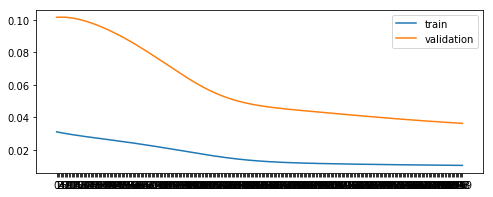

In [48]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 3))
ax.plot(fitted.history['loss'], label='train')
if 'val_loss' in fitted.history.keys():
    ax.plot(fitted.history['val_loss'], label='validation')
ax.legend()
ax.set_xticks(np.arange(EPOCH_NUM))
fig.show()

In [49]:
train_Y_hat_array = fitted.model.predict([train_X, train_decoder_input_Y])
train_Y_real = np.array([scalerY.inverse_transform(Y) for Y  in train_Y])
train_Y_hat = np.array([scalerY.inverse_transform(Y_hat) for Y_hat in train_Y_hat_array])

train_mse_array = [math.sqrt(mean_squared_error(Y_real, Y_hat)) for Y_real, Y_hat in zip(train_Y_real, train_Y_hat)]
train_score = np.mean(train_mse_array)
print('Training Score: %.3f RMSE' % train_score)

Training Score: 4.937 RMSE


### Testing

#### Inference Model

In [50]:
encoder_model = Model(encoder_inputs, encoder_states)

decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
decoder_outputs, state_h, state_c = decoder_lstm(
    decoder_inputs, initial_state=decoder_states_inputs)
decoder_states = [state_h, state_c]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs] + decoder_states)

In [51]:
states_value = encoder_model.predict(test_X)
states_value

[array([[ -1.21006191e-01,   1.76436994e-02,   4.40942764e-01,
           1.41043104e-02],
        [ -1.23298645e-01,   1.91401914e-02,   4.45899963e-01,
           1.28465788e-02],
        [ -1.25514656e-01,   2.05911603e-02,   4.50712204e-01,
           1.16288671e-02],
        [ -1.27657026e-01,   2.19977666e-02,   4.55385208e-01,
           1.04500707e-02],
        [ -1.29728496e-01,   2.33611483e-02,   4.59924966e-01,
           9.30906553e-03],
        [ -1.31731659e-01,   2.46824063e-02,   4.64336783e-01,
           8.20477586e-03],
        [ -1.33669078e-01,   2.59626433e-02,   4.68626082e-01,
           7.13614002e-03],
        [ -1.35543227e-01,   2.72029247e-02,   4.72797960e-01,
           6.10210933e-03],
        [ -1.37356460e-01,   2.84042861e-02,   4.76857275e-01,
           5.10167331e-03],
        [ -1.39111117e-01,   2.95677651e-02,   4.80808735e-01,
           4.13383730e-03],
        [ -1.40809342e-01,   3.06943450e-02,   4.84656900e-01,
           3.19762807e-03],

In [52]:
target_seq = np.zeros((1, timestepY, ndimY))
target_seq

array([[[ 0.],
        [ 0.],
        [ 0.],
        [ 0.]]])

In [53]:
output_tokens, h, c = decoder_model.predict([target_seq] + states_value)
states_value = [h, c]
output_tokens, h, c

(array([[[ 0.59817964],
         [ 0.59973538],
         [ 0.59055996],
         [ 0.57424653]]], dtype=float32),
 array([[-0.13896747,  0.09012289,  0.08467691, -0.10543523]], dtype=float32),
 array([[-0.26892072,  0.17036155,  0.15765633, -0.21580139]], dtype=float32))

#### Inference Model within a Function

In [54]:
def inference_model(latent_dim, test_X, timestepY, ndimY, encoder_inputs, encoder_states):
    encoder_model = Model(encoder_inputs, encoder_states)

    decoder_state_input_h = Input(shape=(latent_dim,))
    decoder_state_input_c = Input(shape=(latent_dim,))
    decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
    decoder_outputs, state_h, state_c = decoder_lstm(
        decoder_inputs, initial_state=decoder_states_inputs)
    decoder_states = [state_h, state_c]
    decoder_outputs = decoder_dense(decoder_outputs)
    decoder_model = Model(
        [decoder_inputs] + decoder_states_inputs,
        [decoder_outputs] + decoder_states)
    
    states_value = encoder_model.predict(test_X)
    
    samples, _, _ = test_X.shape
    target_seq = np.zeros((samples, timestepY, ndimY))
    
    output_tokens, h, c = decoder_model.predict([target_seq] + states_value)
    states_value = [h, c]
    output_tokens, h, c
    
    y_hat_array = output_tokens
    
    return y_hat_array

In [55]:
test_Y_hat_array = inference_model(latent_dim, test_X, timestepY, ndimY, encoder_inputs, encoder_states)
test_Y_hat_array

array([[[ 0.59817964],
        [ 0.59973538],
        [ 0.59055996],
        [ 0.57424653]],

       [[ 0.60045111],
        [ 0.60216534],
        [ 0.59314299],
        [ 0.57710046]],

       [[ 0.60263914],
        [ 0.60449618],
        [ 0.59560835],
        [ 0.57981175]],

       [[ 0.60474807],
        [ 0.60673338],
        [ 0.59796351],
        [ 0.58239031]],

       [[ 0.60678154],
        [ 0.60888219],
        [ 0.60021555],
        [ 0.58484554]],

       [[ 0.60874319],
        [ 0.61094767],
        [ 0.60237074],
        [ 0.58718586]],

       [[ 0.61063659],
        [ 0.61293429],
        [ 0.60443509],
        [ 0.58941901]],

       [[ 0.61246496],
        [ 0.61484635],
        [ 0.60641414],
        [ 0.59155214]],

       [[ 0.61423129],
        [ 0.61668777],
        [ 0.60831296],
        [ 0.59359175]],

       [[ 0.61593854],
        [ 0.61846244],
        [ 0.61013633],
        [ 0.59554386]],

       [[ 0.61758941],
        [ 0.62017375],
        [ 0.61

In [56]:
#test_Y_hat_array = fitted.model.predict(test_X)
test_Y_real = np.array([scalerY.inverse_transform(Y) for Y in test_decoder_target_Y])
test_Y_hat = np.array([scalerY.inverse_transform(Y_hat) for Y_hat in test_Y_hat_array])

mse_array = [math.sqrt(mean_squared_error(Y_real, Y_hat)) for Y_real, Y_hat in zip(test_Y_real, test_Y_hat)]
test_score = np.mean(mse_array)
print('Test Score: %.3f RMSE' % test_score)
print('Real\t:\n %s,\nPredict\t:\n %s' % (test_Y_real[0][:ylen], test_Y_hat[0][:ylen]))

Test Score: 7.190 RMSE
Real	:
 [[ 13.80000019]
 [ 14.        ]
 [ 14.19999981]],
Predict	:
 [[ 11.84395599]
 [ 11.87475967]
 [ 11.69308662]]


# Stateful

* __I’m given a big sequence (e.g. Time Series) and I split it into smaller sequences to construct my input matrix `X`. Is it possible that the LSTM may find dependencies between the sequences?__

    No it’s not possible unless you go for the stateful LSTM.  
    Most of the problems can be solved with stateless LSTM so if you go for the stateful mode, make sure you really need it.  
    In stateless mode, long term memory does not mean that the LSTM will remember the content of the previous batches.
    

* __Why do we make the difference between stateless and stateful LSTM in Keras?__

    A LSTM has cells and is therefore stateful by definition (not the same stateful meaning as used in Keras). Fabien Chollet gives this definition of statefulness:
    > stateful: Boolean (default False).
    > If `True`, the last state for each sample at index `i` in a batch will be used as initial state for the sample of index `i` in the following batch.

    Said differently, whenever you train or test your LSTM, you first have to build your input matrix X
    of shape `(nb_samples, timesteps, input_dim)` where your batch size divides `nb_samples`.  
    For instance, if `nb_samples=1024` and `batch_size=64`, it means that your model will receive blocks of 64 samples,  
    compute each output (whatever the number of `timesteps` is for every sample), average the gradients and propagate it to update the parameters vector.

    By default, Keras shuffles (permutes) the samples in `X` and the dependencies between `Xi` and `Xi+1` are lost. Let’s assume there’s no shuffling in our explanation.

    If the model is `stateless`, the cell states are reset at each sequence.  
    _With the `stateful` model, **all the states are propagated to the next batch.**_  
    It means that the state of the sample located at index `i`, `Xi` will be used in the computation of the sample `Xi+bs` in the next batch, where `bs` is the batch size (no `shuffling`).


* __Why do Keras require the batch size in stateful mode?__

    When the model is `stateless`, Keras allocates an array for the states of size `output_dim` (understand number of cells in your LSTM).  
    At each sequence processing, this state array is reset.

    __In Stateful model, Keras must propagate the previous states for each sample across the batches.__  
    Referring to the explanation above, a sample at index `i` in batch `#1 (Xi+bs)` will know the states of the sample `i` in batch `#0 (Xi)`.  
    In this case, the structure to store the states is of the shape `(batch_size, output_dim)`.  
    This is the reason why you have to specify the batch size at the creation of the LSTM.  
    If you don’t do so, Keras may raise an error to remind you: If a RNN is stateful, a complete `input_shape` must be provided (including batch size).

Done.